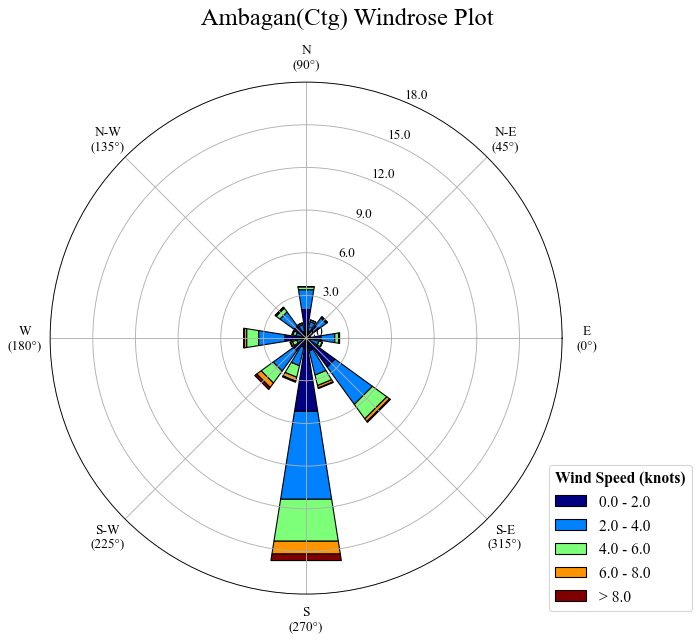

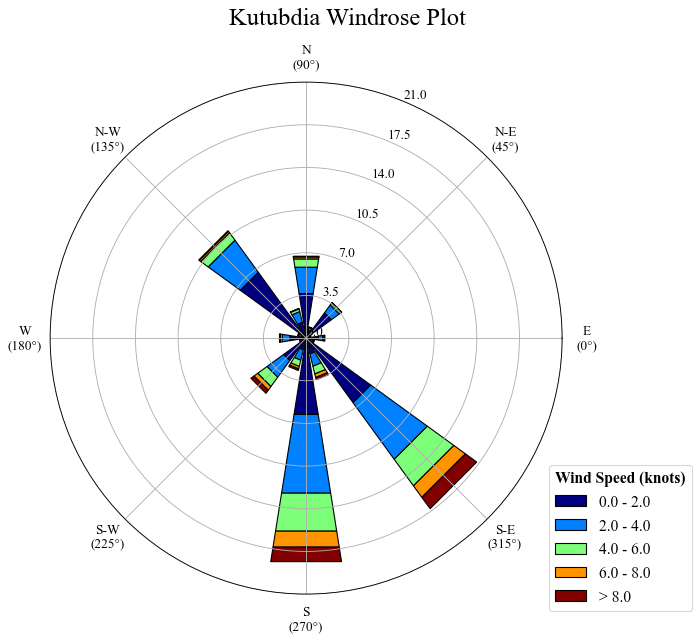

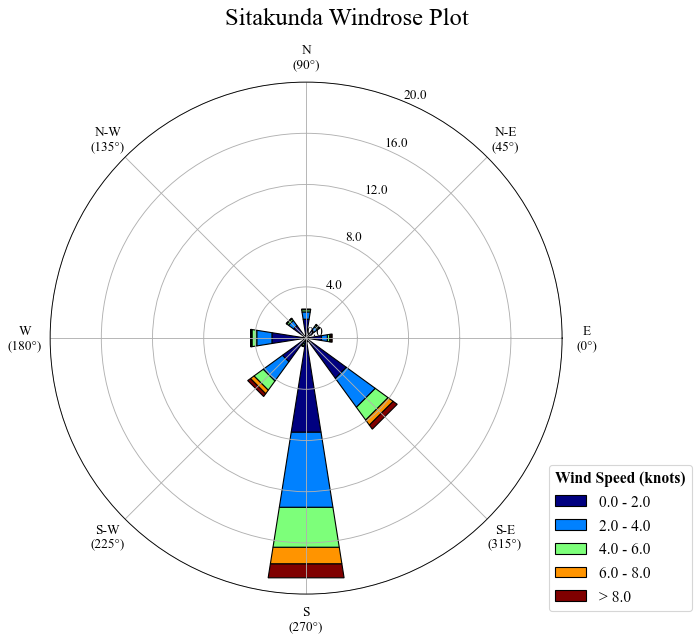

In [3]:
 # https://windrose.readthedocs.io/en/latest/api.html

import windrose
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import mpl_toolkits
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.ticker as ticker
import math
import os
import glob

# Setting the output directory
output_directory = r"E:\Script\BMD_Wind_Data_Processing\New folder\Windrose"

# Ierating throught all the file and plotting the windrose
for file in glob.glob(r"E:\Script\BMD_Wind_Data_Processing\New folder\Windrose\*.csv"):

    # Splitting the file path to extract the station name
    file_path_list = file.split(os.sep)
    station_name = file_path_list[-1].split('_')[0]

    # Reading the csv file and removing the non-number data 
    # from the wind speed and wind direction data column
    df = pd.read_csv(file, low_memory=False)
    col_name  = ['Wind Speed (knots)', 'Wind Direction (degree)']
    df[col_name] = df[col_name].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    df.dropna(subset= col_name, inplace = True)

    # Setting the wind speed and wind direction column and plotting the windrose
    ws = df['Wind Speed (knots)'].astype(float)
    wd = df['Wind Direction (degree)'].astype(float) * 10

    # Setting the Number of wind class and step (needs to be adjusted)
    bins = np.arange(0.01,10,2)

    
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, nsector=16, bins=bins, opening=0.8, edgecolor='k', cmap =cm.jet,
          blowto = None)

    # Seeitng the font and size of the plot
    font={'family':'Times New Roman',
                 'weight':'normal',
                 'size':12}

    plt.rc('font',**font)


    # Direction (x-axis) LABEL FORMATTING

    xtick_labels = ax.get_xticklabels()
    formatted_xticks_label = ['{y}\n({x:.0f}\u00b0)'.format( y = xlabel._text, x=math.degrees(xlabel._x)) \
                              for xlabel in xtick_labels]
    ax.tick_params(axis='x', labelsize=12, pad=12)
    ax.set_xticklabels(formatted_xticks_label)


    # Wind Speed (y-axis) LABEL FORMATTING

    diff = ax.get_yticklabels()[1]._y - ax.get_yticklabels()[0]._y
    step_value = round(diff*2)/2
    max_value = round(ax.get_yticklabels()[-1]._y) + step_value

    np.arange(0.0, max_value,step_value)
    # ax.set_ylim(0,21)
    ax.set_yticks(np.arange(0.0, max_value, step = step_value))
    ax.set_yticklabels(np.arange(0.0, max_value, step = step_value))


    # CUSTOMIZING THE LEGEND
    legend = ax.set_legend(title = 'Wind Speed (knots)', title_fontproperties={'weight':'bold', 'size':14},
                           loc='upper right', prop = {'size':14}, frameon=True, bbox_to_anchor=(1.25, 0.25))
    legend._legend_box.align = "left"

    legend_label_list = []

    for label_txt in ax.get_legend().get_texts():

        if label_txt ==  ax.get_legend().get_texts()[-1]:
            legend_label_list.append('{} {}'.format(label_txt.get_text()[0], label_txt.get_text()[1:]))

        else:
            new_label = '{}-{}'.format(label_txt.get_text().split(':')[0][1:], label_txt.get_text().split(':')[-1][:-1])
            legend_label_list.append(new_label)


    legend_texts = legend.get_texts()

    for i,label in enumerate(legend_label_list):
        legend_texts[i].set_text(label)

    plt.setp(legend.get_texts(), fontsize=14)


    # Setting the title of the plot
    plt.title('{} Windrose Plot'.format(station_name), fontsize=22, x=0.58, y = 1.1)

    # Saving the windrose plot
    plt.savefig(os.path.join(output_directory, '{}_Windrose.jpg'.format(station_name)), 
                dpi = 300, bbox_inches = 'tight')